# Gov Covid API
### https://coronavirus.data.gov.uk/developers-guide

Install library with: `pip install uk-covid19`

In [14]:
import uk_covid19 as cv
import pandas as pd

from datetime import date, timedelta


In [21]:
#Data from the API seems to be incorrect for previous day.

yesterday = date.today() - timedelta(days=1)
dateToRemove = yesterday.strftime('%Y-%m-%d')
dateToRemove

'2020-10-27'

In [27]:
filters = ["areaType=utla", "areaName=Nottinghamshire"] 
#filters = ["areaType=Region"]
dataStructure = {   
    "date": "date", 
    "name": "areaName", 
    "code":"areaCode",
    "newCases": "newCasesBySpecimenDate", 
    "cumCases": "cumCasesBySpecimenDate", 
    "newDeaths": "newDeathsByDeathDate", 
    "cumDeathsByDeathDate":"cumDeathsByDeathDate",
    "plannedCapacityByPublishDate":"plannedCapacityByPublishDate"
    } 

objCV19 = cv.Cov19API(filters=filters, structure=dataStructure) 

result = objCV19.get_dataframe()

result = result.drop(result[result.date == dateToRemove].index)
result = result.sort_values(by="date")

result.head(50)

,date,name,code,newCases,cumCases,newDeaths,cumDeathsByDeathDate,plannedCapacityByPublishDate
249,2020-02-21,Nottinghamshire,E10000024,1,1,NaN,NaN,None
248,2020-02-22,Nottinghamshire,E10000024,0,1,NaN,NaN,None
247,2020-02-23,Nottinghamshire,E10000024,0,1,NaN,NaN,None
246,2020-02-24,Nottinghamshire,E10000024,0,1,NaN,NaN,None
245,2020-02-25,Nottinghamshire,E10000024,0,1,NaN,NaN,None
244,2020-02-26,Nottinghamshire,E10000024,0,1,NaN,NaN,None
243,2020-02-27,Nottinghamshire,E10000024,0,1,NaN,NaN,None
242,2020-02-28,Nottinghamshire,E10000024,0,1,NaN,NaN,None
241,2020-02-29,Nottinghamshire,E10000024,0,1,NaN,NaN,None
240,2020-03-01,Nottinghamshire,E10000024,0,1,NaN,NaN,None


In [28]:
filterDate = "2020-10-01"
selectedDates = result["date"] >= filterDate

df = result.loc[selectedDates]
df.head(30)

,date,name,code,newCases,cumCases,newDeaths,cumDeathsByDeathDate,plannedCapacityByPublishDate
26,2020-10-01,Nottinghamshire,E10000024,147,5062,2.0,566.0,None
25,2020-10-02,Nottinghamshire,E10000024,194,5256,2.0,568.0,None
24,2020-10-03,Nottinghamshire,E10000024,186,5442,1.0,569.0,None
23,2020-10-04,Nottinghamshire,E10000024,185,5627,1.0,570.0,None
22,2020-10-05,Nottinghamshire,E10000024,281,5908,0.0,570.0,None
21,2020-10-06,Nottinghamshire,E10000024,263,6171,1.0,571.0,None
20,2020-10-07,Nottinghamshire,E10000024,283,6454,1.0,572.0,None
19,2020-10-08,Nottinghamshire,E10000024,325,6779,0.0,572.0,None
18,2020-10-09,Nottinghamshire,E10000024,258,7037,0.0,572.0,None
17,2020-10-10,Nottinghamshire,E10000024,211,7248,0.0,572.0,None


<AxesSubplot:xlabel='date'>

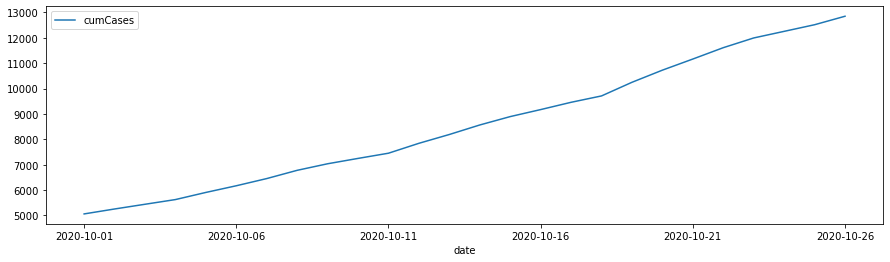

In [30]:
df.plot(figsize=(15,4), x="date", y="cumCases", kind="line")

<AxesSubplot:xlabel='date'>

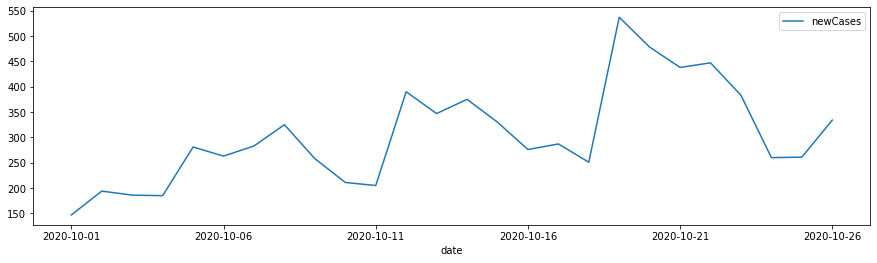

In [31]:
df.plot(figsize=(15,4), x="date", y="newCases", kind="line")

<AxesSubplot:xlabel='date'>

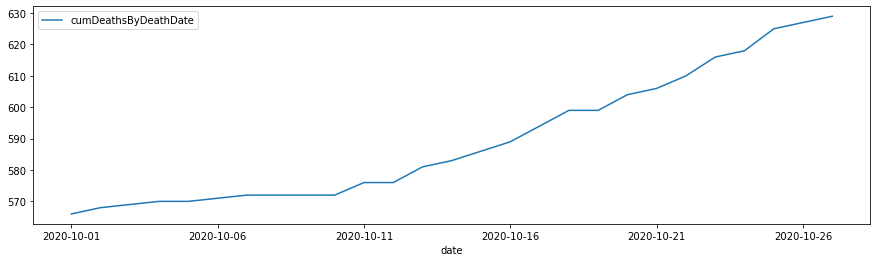

In [6]:
df.plot(figsize=(15,4), x="date", y="cumDeathsByDeathDate", kind="line")